<a href="https://colab.research.google.com/github/plaban1981/ACADGILD-Assignment-6_2/blob/master/Santander_Customer_Transaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please follow the steps below to download and use kaggle data within Google Colab:

Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

Click on Create New API Token - It will download kaggle.json file on your machine.

Go to your Google Colab project file and run the following commands:

1) ! pip install -q kaggle

2) from google.colab import files

files.upload()

Choose the kaggle.json file that you downloaded 3) ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Make directory named kaggle and copy kaggle.json file there. 4) ! chmod 600 ~/.kaggle/kaggle.json

Change the permissions of the file. 5) ! kaggle datasets list

That's all ! You can check if everything's okay by running this command.
Download Data ! kaggle competitions download -c 'name-of-competition'

Use unzip command to unzip the data:

For example,

Create a directory named train,

! mkdir train

unzip train data there,

! unzip train.zip -d train



In [1]:
!pip install lightgbm

In [0]:
!pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"2b9ef9d5d9b2b96afae55ac4ad620708"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c santander-customer-transaction-prediction

 99% 121M/122M [00:02<00:00, 29.0MB/s]
100% 122M/122M [00:03<00:00, 42.4MB/s]
  0% 0.00/463k [00:00<?, ?B/s]
100% 463k/463k [00:00<00:00, 26.6MB/s]
 93% 113M/122M [00:03<00:00, 28.6MB/s] 
100% 122M/122M [00:03<00:00, 33.5MB/s]


In [5]:
! mkdir train_stan
! unzip train.csv.zip -d train_stan

Archive:  train.csv.zip
  inflating: train_stan/train.csv    


In [6]:
! mkdir test_stan
! unzip test.csv.zip -d test_stan

Archive:  test.csv.zip
  inflating: test_stan/test.csv      


In [8]:
!pip install scikit-plot

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
import datetime as dt
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from datetime import datetime
import scikitplot

# Santander Customer Transaction Prediction

<p style='font-size:18px'><b> Problem Statemtent </b></p>
In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

<p style='font-size:18px'><b> Source:  </b>https://www.kaggle.com/c/santander-customer-transaction-prediction/data</p>


<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

In [2]:
df_train = pd.read_csv("train_stan/train.csv")
df_train.shape

(200000, 202)

In [11]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


**Train contains:**

ID_code (string)

target

200 numerical variables named from var_0 to var_199

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [13]:
df_train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

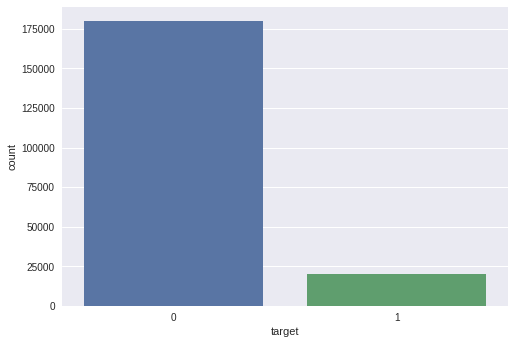

In [14]:
sns.countplot("target",data=df_train)

**The data is unbalanced with respect with target value.**

In [15]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [0]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();


<Figure size 576x396 with 0 Axes>

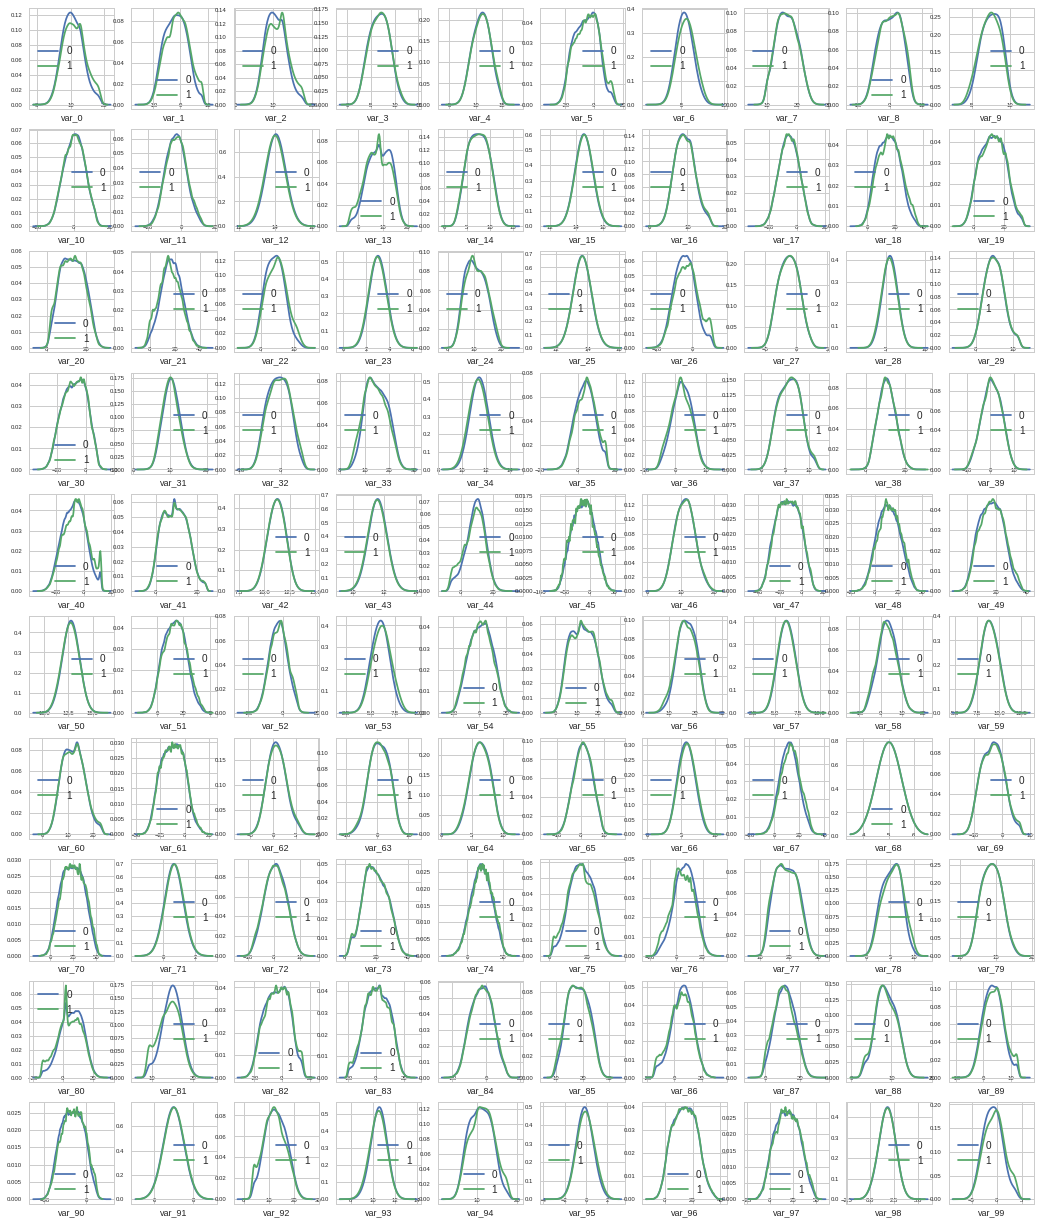

In [17]:
t0 = df_train.loc[df_train['target'] == 0]
t1 = df_train.loc[df_train['target'] == 1]
features = df_train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

**We can observe that there is a considerable number of features with significant different distribution for the two target values.**
For example, var_0, var_1, var_2, var_5, var_9, var_13, var_106, var_109, var_139 and many others.

Also some features, like var_2, var_13, var_26, var_55, var_175, var_184, var_196 shows a distribution that resambles to a bivariate distribution.

We will take this into consideration in the future for the selection of the features for our prediction model.

**Feature Corelation**

In [0]:
%%time
correlations = df_train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]


CPU times: user 4.13 s, sys: 10.2 ms, total: 4.14 s
Wall time: 4.15 s


In [0]:
correlations.head(10)

,level_0,level_1,0
0,var_2,var_84,0.000002
1,var_84,var_2,0.000002
2,var_63,var_5,0.000002
3,var_5,var_63,0.000002
4,var_62,var_99,0.000003
5,var_99,var_62,0.000003
6,var_40,var_75,0.000003
7,var_75,var_40,0.000003
8,var_17,var_51,0.000005
9,var_51,var_17,0.000005


In [0]:
correlations.tail(10)

,level_0,level_1,0
9890,var_26,var_48,0.007992
9891,var_48,var_26,0.007992
9892,var_72,var_26,0.008062
9893,var_26,var_72,0.008062
9894,var_13,var_2,0.008795
9895,var_2,var_13,0.008795
9896,var_80,var_1,0.008855
9897,var_1,var_80,0.008855
9898,var_80,var_6,0.008958
9899,var_6,var_80,0.008958


In [0]:
correlations.shape

(9900, 3)

Very less correlation

In [0]:
df_test =  pd.read_csv("test_stan/test.csv")

In [17]:
df_test.shape

(200000, 201)

In [20]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
df_train_no_dup = df_train.drop_duplicates(keep='first')

In [22]:
df_train_no_dup.shape

(200000, 202)

In [3]:
df_train.shape

(200000, 202)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X= df_train.drop(['ID_code', 'target'],axis=1)
Y = df_train['target']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [7]:
x_train.shape,x_test.shape

((140000, 200), (60000, 200))

<h1>4. Machine Learning Models </h1>

In [0]:
start = datetime.now()
classifier = SGDClassifier(loss='log', alpha=0.00001, penalty='l1')
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

In [42]:
accuracy_score(y_test,predictions)

0.88115

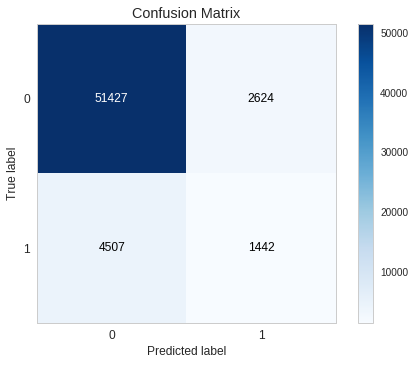

In [43]:
scikitplot.metrics.plot_confusion_matrix(y_test,predictions)

**Upsampling **

In [22]:
from sklearn.utils import resample
train_majority = df_train[df_train.target==0]
train_minority = df_train[df_train.target==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['target'].value_counts()

1    179902
0    179902
Name: target, dtype: int64

In [33]:
train_upsampled.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
198918,train_198918,1,12.2222,-2.9605,15.2106,7.1285,11.9034,-15.0779,4.9015,17.7138,...,8.8862,4.3191,3.7639,-0.0127,24.0361,0.9582,-8.1237,9.6159,17.3282,10.9707
156737,train_156737,1,11.8959,1.3788,13.5375,5.0525,9.9600,14.2843,5.4856,16.7646,...,3.6831,9.3457,2.8876,1.1330,18.9194,2.4080,-5.5398,8.9348,7.8511,12.8115
176966,train_176966,1,13.0774,3.9766,12.9911,8.5751,9.6808,-5.9521,4.8225,23.3958,...,12.9824,5.3682,3.6055,3.3179,22.3184,1.0118,11.9471,9.9397,16.7496,-23.8729
153337,train_153337,1,18.2533,-1.7977,12.3645,7.5727,11.8523,2.1715,5.2007,19.4675,...,-2.0416,11.6085,0.0811,6.4918,17.7655,0.0290,9.4554,8.4979,23.1749,9.0798
77503,train_77503,1,6.8680,-2.2332,12.4851,8.6074,12.0704,2.7317,5.4826,13.4432,...,6.3215,13.8047,1.3918,0.4637,20.8961,-2.4102,7.1244,9.5000,11.0813,6.4466


In [0]:
X= train_upsampled.drop(['ID_code', 'target'],axis=1)
Y = train_upsampled['target']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [0]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [0]:
start = datetime.now()
classifier = SGDClassifier(loss='log', alpha=0.00001, penalty='l1')
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

In [47]:
accuracy_score(y_test,predictions)

0.6920197884048841

**Logistic Regression**

In [0]:
X= df_train.drop(['ID_code', 'target'],axis=1)
Y = df_train['target']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [0]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [48]:
x_train.shape,x_test.shape

((140000, 200), (60000, 200))

In [0]:
start = datetime.now()
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

In [15]:
accuracy_score(y_test,predictions)

0.9151166666666667

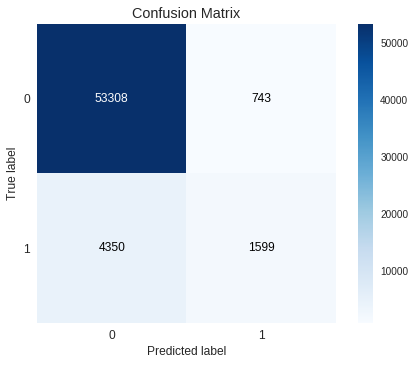

In [16]:
scikitplot.metrics.plot_confusion_matrix(y_test,predictions)

**upsampling**

In [0]:


X_train,X_test,y_train,y_test = train_test_split(train_upsampled.drop(['ID_code', 'target'],axis=1),train_upsampled['target'],test_size=0.3,random_state=1)

In [24]:
X_train.shape,X_test.shape

((251862, 200), (107942, 200))

In [0]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [30]:
%time()
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [31]:
accuracy_score(y_test,predictions)

0.7790294787941673

**lightGBM**

**parameters**

- Used ‘binary’ as objective(remember this is classification problem)

- Used ‘binary_logloss’ as metric(same reason, binary classification problem)
‘
- num_leaves’=10 (as it is small data)
‘
-boosting type’ is gbdt, we are implementing gradient boosting(you can try random forest)

In [10]:
import lightgbm as lgb
params = {
        'num_leaves': 6,
        'max_bin': 63,
        'min_data_in_leaf': 45,
        'learning_rate': 0.01,
        'min_sum_hessian_in_leaf': 0.000446,
        'bagging_fraction': 0.55, 
        'bagging_freq': 5, 
        'max_depth': 14,
        'save_binary': True,
        'seed': 31452,
        'feature_fraction_seed': 31415,
         'feature_fraction': 0.51,
        'bagging_seed': 31415,
        'drop_seed': 31415,
        'data_random_seed': 31415,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
    }
d_train = lgb.Dataset(x_train, label=y_train)
clf = lgb.train(params, d_train, 100)
clf.feature_importance()

array([ 8,  0,  5,  0,  0,  0, 25,  0,  0,  1,  0,  0, 41,  4,  0,  0,  0,
        0,  0,  0,  0,  8, 12,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  6,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
        0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  6,  0,  9, 44,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0, 19,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 22, 29,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,
        0,  0,  0, 49,  0,  0,  0,  0,  0,  0, 25,  0, 14,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  7, 15,  0,  0,  0,
        3,  0,  0,  0, 25,  0,  0,  1,  0,  6,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  9,  0])

**Model prediction**

In [0]:
#Prediction
y_pred=clf.predict(x_test)

In [12]:
len(y_pred)

60000

In [13]:
y_pred[:10]

array([0.41777541, 0.42046788, 0.45137005, 0.40987887, 0.41685015,
       0.47521612, 0.57150069, 0.52212165, 0.49700927, 0.42713846])

Output will be a list of probabilities.

Convert probabilities to binary prediction keeping threshold=0.5

In [0]:
predictions = []

#convert into binary values
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
       predictions.append(1)
    else:  
       predictions.append(0)

In [15]:
accuracy_score(y_test,predictions)

0.6643666666666667

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
warnings.filterwarnings('ignore')

In [0]:
features = X.columns
target = Y

In [28]:
folds = StratifiedKFold(n_splits=9, shuffle=True, random_state=31415)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 15000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 250)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 250 rounds.
[1000]	training's auc: 0.861164	valid_1's auc: 0.848564
[2000]	training's auc: 0.88989	valid_1's auc: 0.873436
[3000]	training's auc: 0.902694	valid_1's auc: 0.883105
[4000]	training's auc: 0.910602	valid_1's auc: 0.888531
[5000]	training's auc: 0.91585	valid_1's auc: 0.891449
[6000]	training's auc: 0.919596	valid_1's auc: 0.893232
[7000]	training's auc: 0.922706	valid_1's auc: 0.89452
[8000]	training's auc: 0.925577	valid_1's auc: 0.895022
[9000]	training's auc: 0.928255	valid_1's auc: 0.89535
[10000]	training's auc: 0.931026	valid_1's auc: 0.895635
Early stopping, best iteration is:
[10216]	training's auc: 0.931614	valid_1's auc: 0.895738
Fold 1
Training until validation scores don't improve for 250 rounds.
[1000]	training's auc: 0.862338	valid_1's auc: 0.84451
[2000]	training's auc: 0.88972	valid_1's auc: 0.87061
[3000]	training's auc: 0.902528	valid_1's auc: 0.882319
[4000]	training's auc: 0.910284	valid_1's auc:

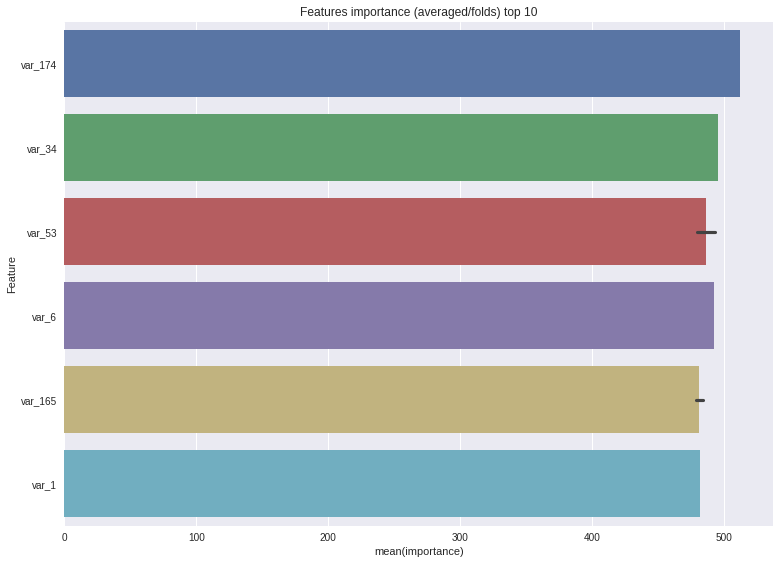

In [34]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(11,8))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False).head(10))
plt.title('Features importance (averaged/folds) top 10')
plt.tight_layout()
plt.savefig('FI.png')

In [42]:
x_train.shape,y_train.shape

((140000, 200), (140000,))

In [51]:
type(y_train),type(x_train),x_train[]

(pandas.core.series.Series, numpy.ndarray)

In [58]:
Y.dtype

dtype('int64')

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 200 entries, var_0 to var_199
dtypes: float64(200)
memory usage: 305.2 MB


In [0]:
X_test_scaled = sc.fit_transform(df_test.drop('ID_code',axis=1))

In [66]:
X_test_scaled[:,1]

array([ 2.32744611,  0.71242283, -2.16157859, ...,  0.96551038,
        0.27492737,  0.84921287])

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [60]:
X_scaled = sc.fit_transform(X)
type(X_scaled)

numpy.ndarray

In [0]:
X = pd.DataFrame(X_scaled)

In [62]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model.

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,accuracy_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [107]:
#Grid Search
logreg = LogisticRegression(class_weight=None)
param = {'C':[0.001,0.003,0.005,0.01]}
clf = GridSearchCV(logreg,param,scoring='accuracy',refit=True,cv=10)
clf.fit(X,Y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.9143, with best C: {'C': 0.003}


In [76]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
pred_test_full =0
cv_score =[]
i=1
X 
for train_index,test_index in kf.split(X,Y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = Y.loc[train_index],Y.loc[test_index]
    
    
    
    #model
    lr = LogisticRegression()
    lr.fit(xtr,ytr)
    score = accuracy_score(yvl,lr.predict(xvl))
    print('AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test_scaled)[:,1]
    pred_test_full +=pred_test
    i+=1
    
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

1 of KFold 5
AUC score: 0.9146521336966575
2 of KFold 5
AUC score: 0.9148771280717982
3 of KFold 5
AUC score: 0.9143
4 of KFold 5
AUC score: 0.9141978549463736
5 of KFold 5
AUC score: 0.9141478536963424
Confusion matrix
 [[35475   505]
 [ 2929  1090]]
Cv [0.9146521336966575, 0.9148771280717982, 0.9143, 0.9141978549463736, 0.9141478536963424] 
Mean cv Score 0.9144349940822345


In [80]:
lr.coef_[0]

array([ 0.16727473,  0.16806581,  0.17709077,  0.03087226,  0.0373183 ,
        0.10498408,  0.21582016, -0.00185609,  0.06007368, -0.13172162,
       -0.00586518,  0.08151264, -0.22455894, -0.17738871, -0.01439893,
        0.05478114,  0.02240311,  0.00093221,  0.13331872,  0.03077297,
       -0.06482026, -0.19033909,  0.19644972, -0.09225929,  0.09623253,
        0.03706747,  0.2031068 , -0.00643801, -0.08579261,  0.02948666,
        0.00168595, -0.08584819,  0.09989827, -0.15243034, -0.16734501,
        0.12316348, -0.12817703,  0.02752453, -0.00327608, -0.01509058,
        0.16798325, -0.00686474, -0.02899782, -0.0910904 , -0.16999802,
       -0.06971482,  0.0079811 ,  0.03436369,  0.11217876,  0.09236886,
       -0.04802468,  0.07618117,  0.09679385,  0.20658051, -0.05766165,
        0.05848328, -0.11382363, -0.04856229, -0.08352159, -0.04304149,
        0.02222702,  0.02694206,  0.05654266, -0.04556512, -0.0433527 ,
        0.03151089,  0.06766504,  0.15293892, -0.03240473,  0.01

In [96]:
df_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [0]:
features=df_train.drop(['ID_code', 'target'],axis=1)

In [0]:
df_feature_imporatnce = pd.DataFrame({'Features':features.columns,"Weightage": lr.coef_[0]})

In [0]:
df_feature_imporatnce = df_feature_imporatnce.sort_values('Weightage',ascending=False)

In [100]:
df_feature_imporatnce.head()

,Features,Weightage
6,var_6,0.215820
53,var_53,0.206581
110,var_110,0.204345
26,var_26,0.203107
22,var_22,0.196450


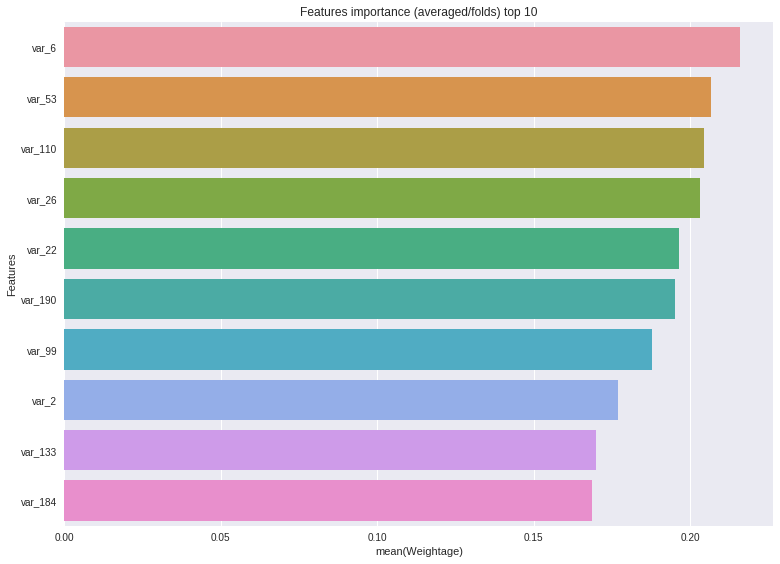

In [101]:
plt.figure(figsize=(11,8))
sns.barplot(x="Weightage", y="Features", data=df_feature_imporatnce.head(10))
plt.title('Features importance (averaged/folds) top 10')
plt.tight_layout()

Text(0.5, 0, 'False positive rate')

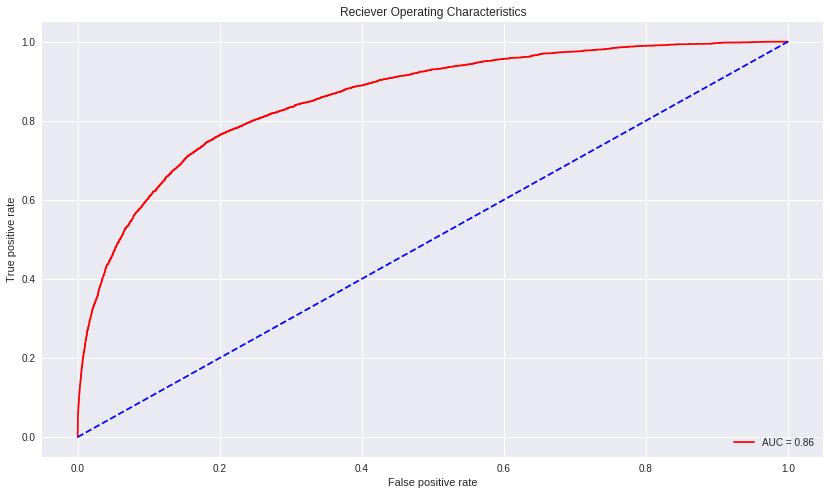

In [102]:
proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

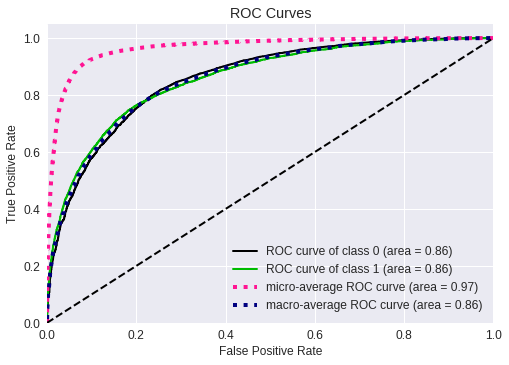

In [104]:
scikitplot.metrics.plot_roc(yvl,lr.predict_proba(xvl))

**Final Predictions**

In [0]:
Lables = lr.predict(X_test_scaled)

In [0]:
df_sub = pd.DataFrame({'ID_code':df_test.ID_code.values,'target':Lables})

In [111]:
df_sub.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


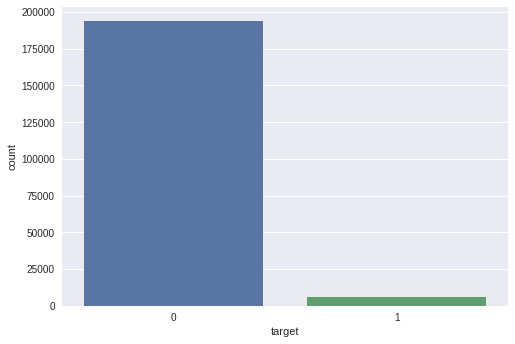

In [112]:
sns.countplot(x="target",data=df_sub)

In [0]:
df_sub.to_csv('sub.csv',index=False)

In [120]:
from sklearn.linear_model import LogisticRegressionCV


#
X= df_train.drop(['ID_code', 'target'],axis=1)
Y = df_train['target']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
#
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)
#

lrcv = LogisticRegressionCV(cv=10, random_state=1)
lrcv.fit(x_train,y_train)

pred = lrcv.predict(x_test)

print(accuracy_score(y_test,pred))

0.9152333333333333


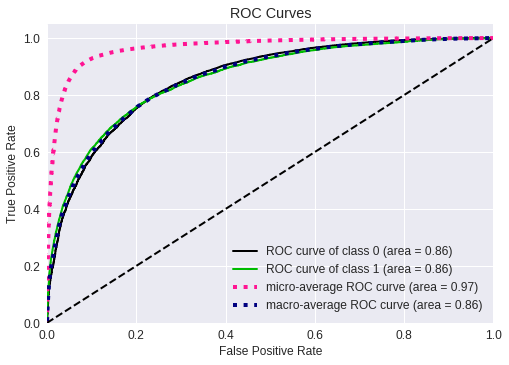

In [121]:
scikitplot.metrics.plot_roc(y_test,lrcv.predict_proba(x_test))

In [122]:
Lables1 = lrcv.predict(X_test_scaled)
df_sub1 = pd.DataFrame({'ID_code':df_test.ID_code.values,'target':Lables})
print(df_sub1.head())
df_sub1.to_csv('sub1.csv',index=False)

  ID_code  target
0  test_0       0
1  test_1       0
2  test_2       0
3  test_3       0
4  test_4       0


In [118]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f sub.csv -m "Message"

100% 2.56M/2.56M [00:14<00:00, 190kB/s]
Successfully submitted to Santander Customer Transaction Prediction